# Bank Marketing Campaign EDA + LR Training

In [30]:
# Packages Import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Import Dataset 

train_data = pd.read_csv("/workspaces/gustavolima-bank-eda/data/raw/bank-marketing-campaign-data.csv", delimiter=';')
test_data = pd.read_csv("/workspaces/gustavolima-bank-eda/data/raw/bank-marketing-campaign-data.csv", delimiter=';')

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.head()


,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Explore the DataSet


In [32]:
# Dataset Shape

total_data.shape

(82376, 22)

In [33]:
# Dataset Info about Data Types and NA

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82376 entries, 0 to 82375
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           82376 non-null  int64  
 1   age             82376 non-null  int64  
 2   job             82376 non-null  object 
 3   marital         82376 non-null  object 
 4   education       82376 non-null  object 
 5   default         82376 non-null  object 
 6   housing         82376 non-null  object 
 7   loan            82376 non-null  object 
 8   contact         82376 non-null  object 
 9   month           82376 non-null  object 
 10  day_of_week     82376 non-null  object 
 11  duration        82376 non-null  int64  
 12  campaign        82376 non-null  int64  
 13  pdays           82376 non-null  int64  
 14  previous        82376 non-null  int64  
 15  poutcome        82376 non-null  object 
 16  emp.var.rate    82376 non-null  float64
 17  cons.price.idx  82376 non-null 

There's no NaN data in the dataset which is good

In [34]:
# Find Duplicates and Clear Them

if total_data.duplicated().sum() > 0 :
    total_data.drop_duplicates(),

total_data.shape

(82376, 22)

For now, after analysis, there's is no Feature to remove, all of them can be used for our model. 

### Univariate Data Analysis

#### Univariate Categorical Data Analysis

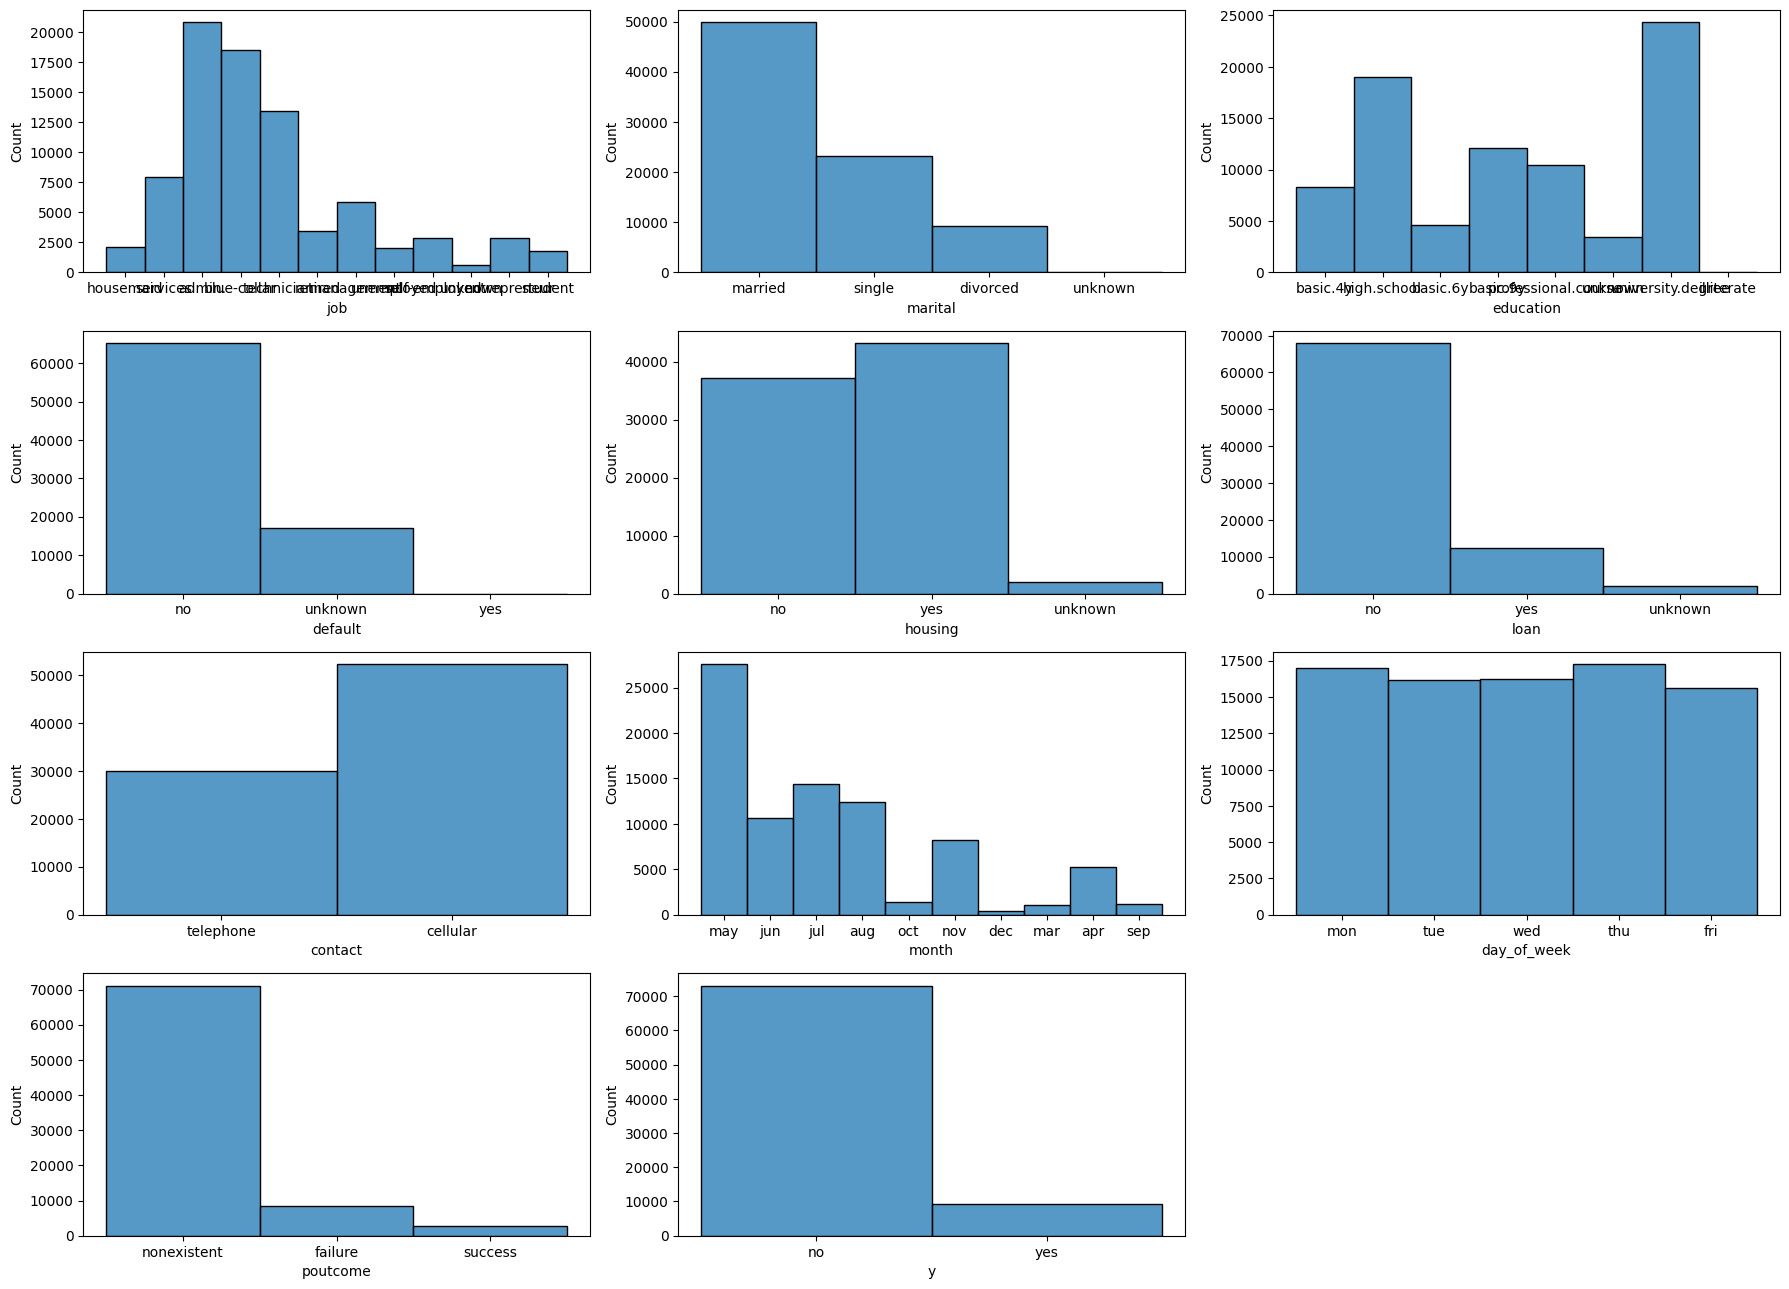

In [35]:
# Plot Categorial Data in Historgrams

fig, axis = plt.subplots(4, 3, figsize=(18, 13))

# Create the Plots

sns.histplot(ax= axis[0,0], data= total_data, x= 'job')
sns.histplot(ax= axis[0,1], data= total_data, x= 'marital')
sns.histplot(ax= axis[0,2], data= total_data, x= 'education')
sns.histplot(ax= axis[1,0], data= total_data, x= 'default')
sns.histplot(ax= axis[1,1], data= total_data, x= 'housing')
sns.histplot(ax= axis[1,2], data= total_data, x= 'loan')
sns.histplot(ax= axis[2,0], data= total_data, x= 'contact')
sns.histplot(ax= axis[2,1], data= total_data, x= 'month')
sns.histplot(ax= axis[2,2], data= total_data, x= 'day_of_week')
sns.histplot(ax= axis[3,0], data= total_data, x= 'poutcome')
sns.histplot(ax= axis[3,1], data= total_data, x= 'y')
fig.delaxes(axis[3,2])

# Tight Layout
plt.tight_layout()

# Plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

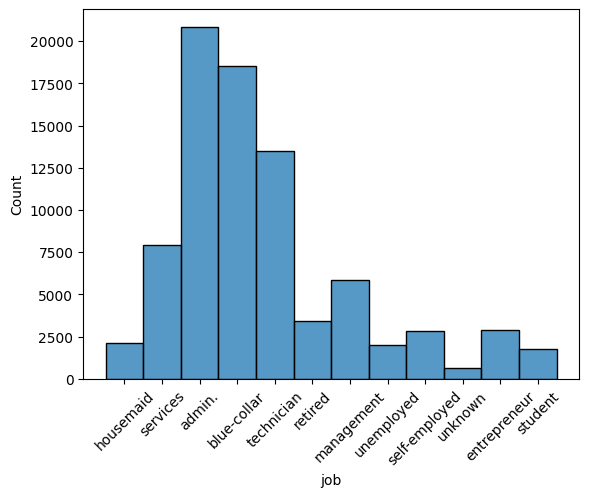

In [36]:
sns.histplot(data= total_data, x= 'job')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

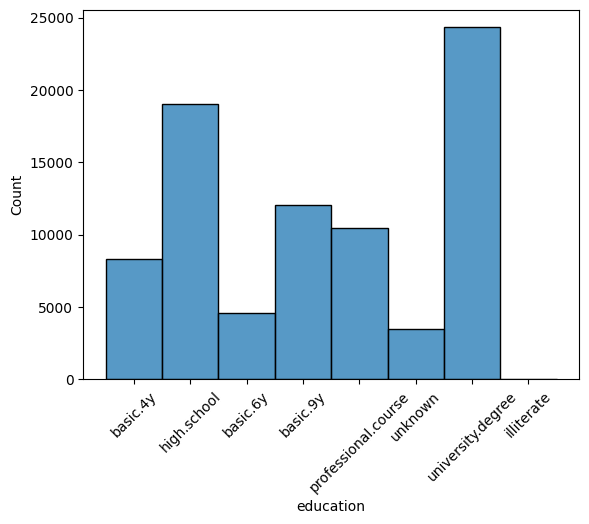

In [37]:
sns.histplot(data= total_data, x= 'education')
plt.xticks(rotation=45)
plt.show

We can observe a few things from this data:

- Adminstrative, Blue-Collar and Technicians are most of the job count. 
- Majority of customers are married, followed by single.
- The customers are mainly University Educated and High School
- Customers have no credits, but the majority have house loans, but only a little percentage have personal loans
- Summer time is when there are more calls, and everyday a similar number of calls is done
- And majority of customer refuse the product offer, which makes the campaign not that succesful

#### Univariate Numerical Data Analysis

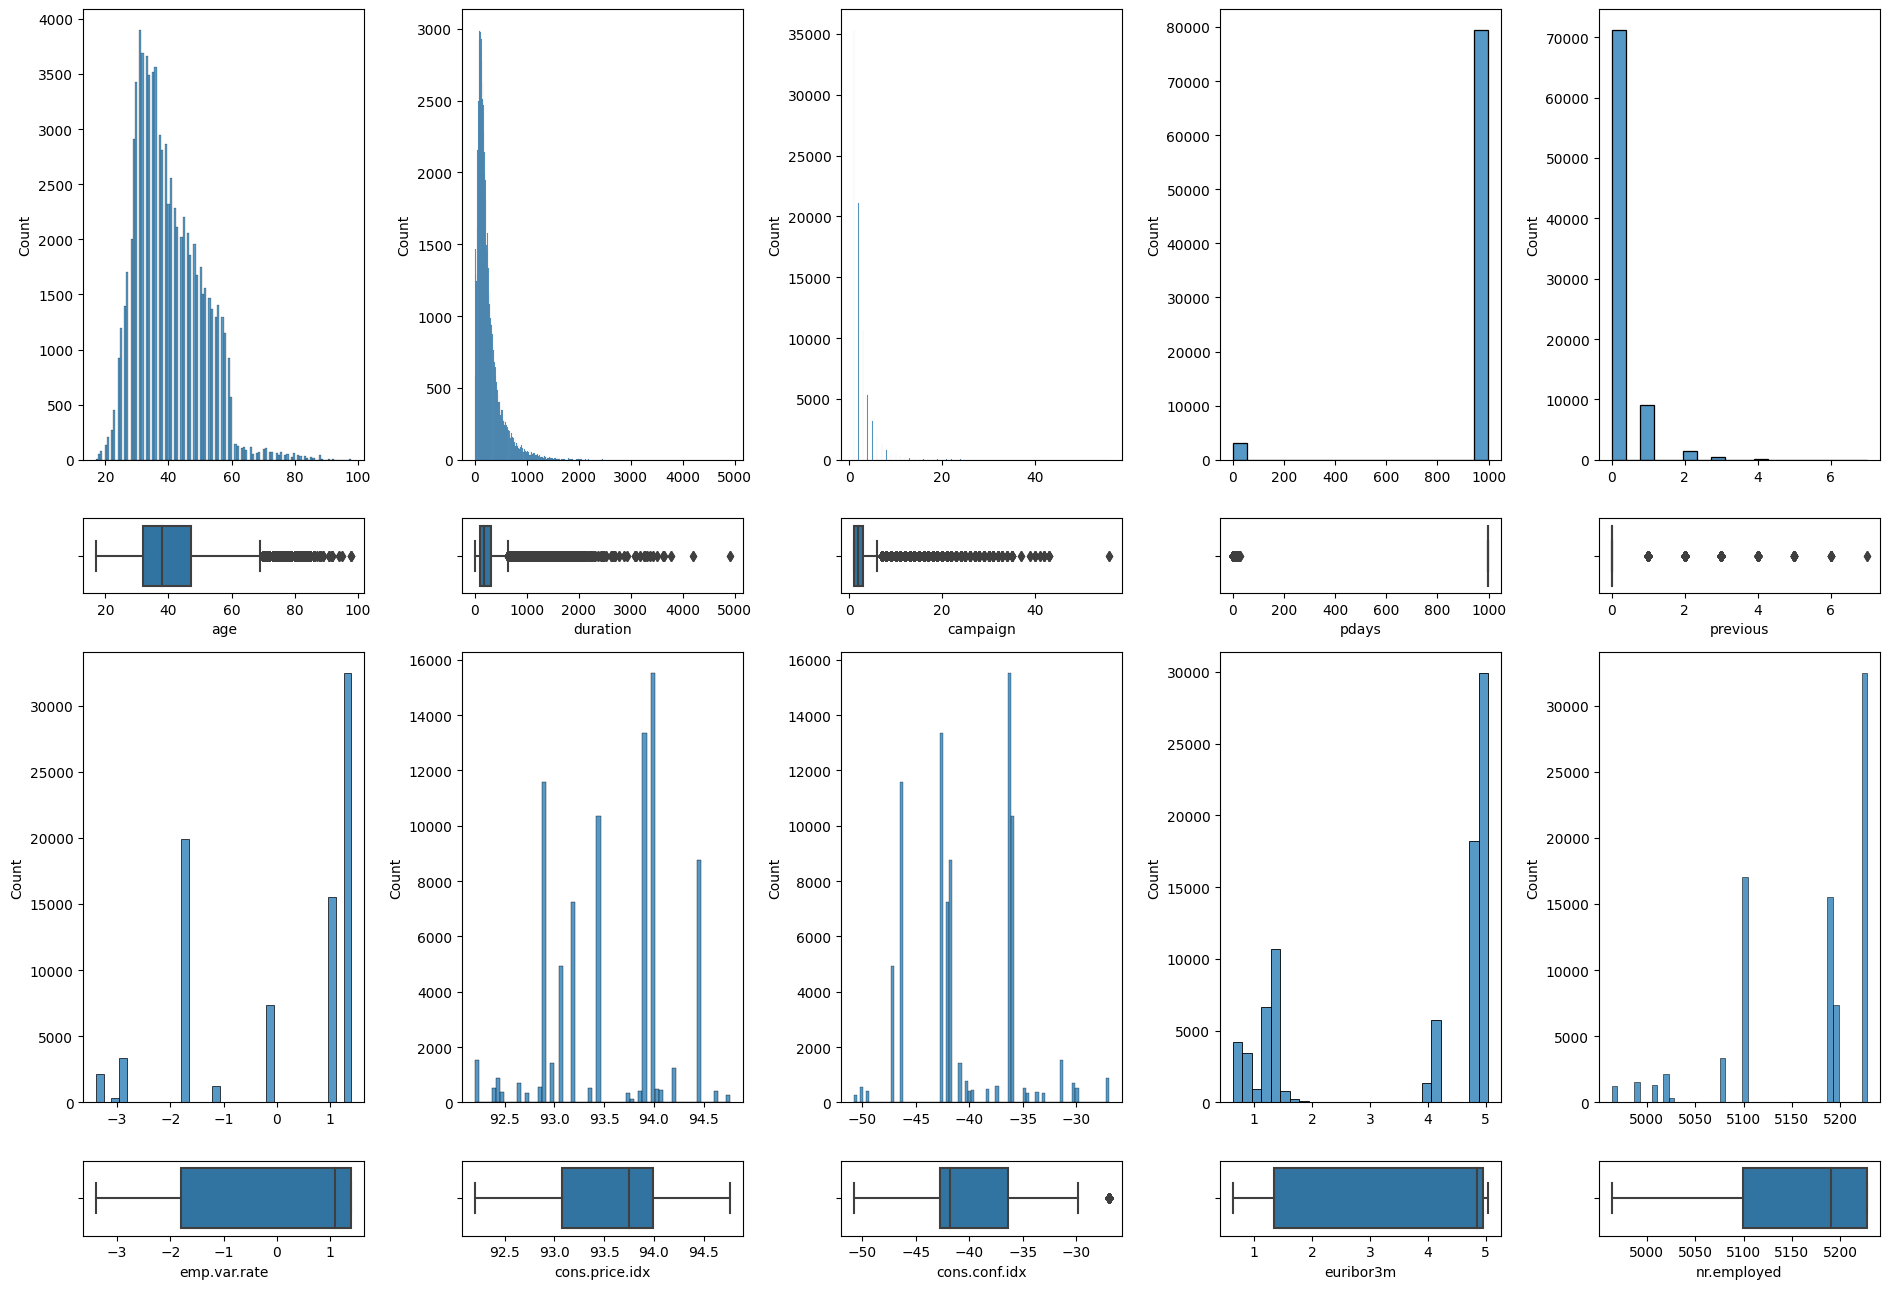

In [38]:
# Univariate Numerical Data Analysis

# Draw Canvas
fig, axis = plt.subplots(4, 5, figsize = (19, 13), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Plot the Data

sns.histplot(ax=axis[0,0], data=total_data, x='age').set(xlabel = None)
sns.boxplot(ax=axis[1,0], data=total_data, x='age')
sns.histplot(ax=axis[0,1], data=total_data, x='duration').set(xlabel = None)
sns.boxplot(ax=axis[1,1], data=total_data, x='duration')
sns.histplot(ax=axis[0,2], data=total_data, x='campaign').set(xlabel = None)
sns.boxplot(ax=axis[1,2], data=total_data, x='campaign')
sns.histplot(ax=axis[0,3], data=total_data, x='pdays').set(xlabel = None)
sns.boxplot(ax=axis[1,3], data=total_data, x='pdays')
sns.histplot(ax=axis[0,4], data=total_data, x='previous').set(xlabel = None)
sns.boxplot(ax=axis[1,4], data=total_data, x='previous')
sns.histplot(ax=axis[2,0], data=total_data, x='emp.var.rate').set(xlabel = None)
sns.boxplot(ax=axis[3,0], data=total_data, x='emp.var.rate')
sns.histplot(ax=axis[2,1], data=total_data, x='cons.price.idx').set(xlabel = None)
sns.boxplot(ax=axis[3,1], data=total_data, x='cons.price.idx')
sns.histplot(ax=axis[2,2], data=total_data, x='cons.conf.idx').set(xlabel = None)
sns.boxplot(ax=axis[3,2], data=total_data, x='cons.conf.idx')
sns.histplot(ax=axis[2,3], data=total_data, x='euribor3m').set(xlabel = None)
sns.boxplot(ax=axis[3,3], data=total_data, x='euribor3m')
sns.histplot(ax=axis[2,4], data=total_data, x='nr.employed').set(xlabel = None)
sns.boxplot(ax=axis[3,4], data=total_data, x='nr.employed')

# Tight Layout Adjustment
plt.tight_layout()

# Plot the Data
plt.show()

We can see by the data that:

- age, campaign, previous are close to a normal distributions, with a lot of outliers far from the normal distribution

### Multivariate Variables Analysis

#### Numerical-numerical analysis

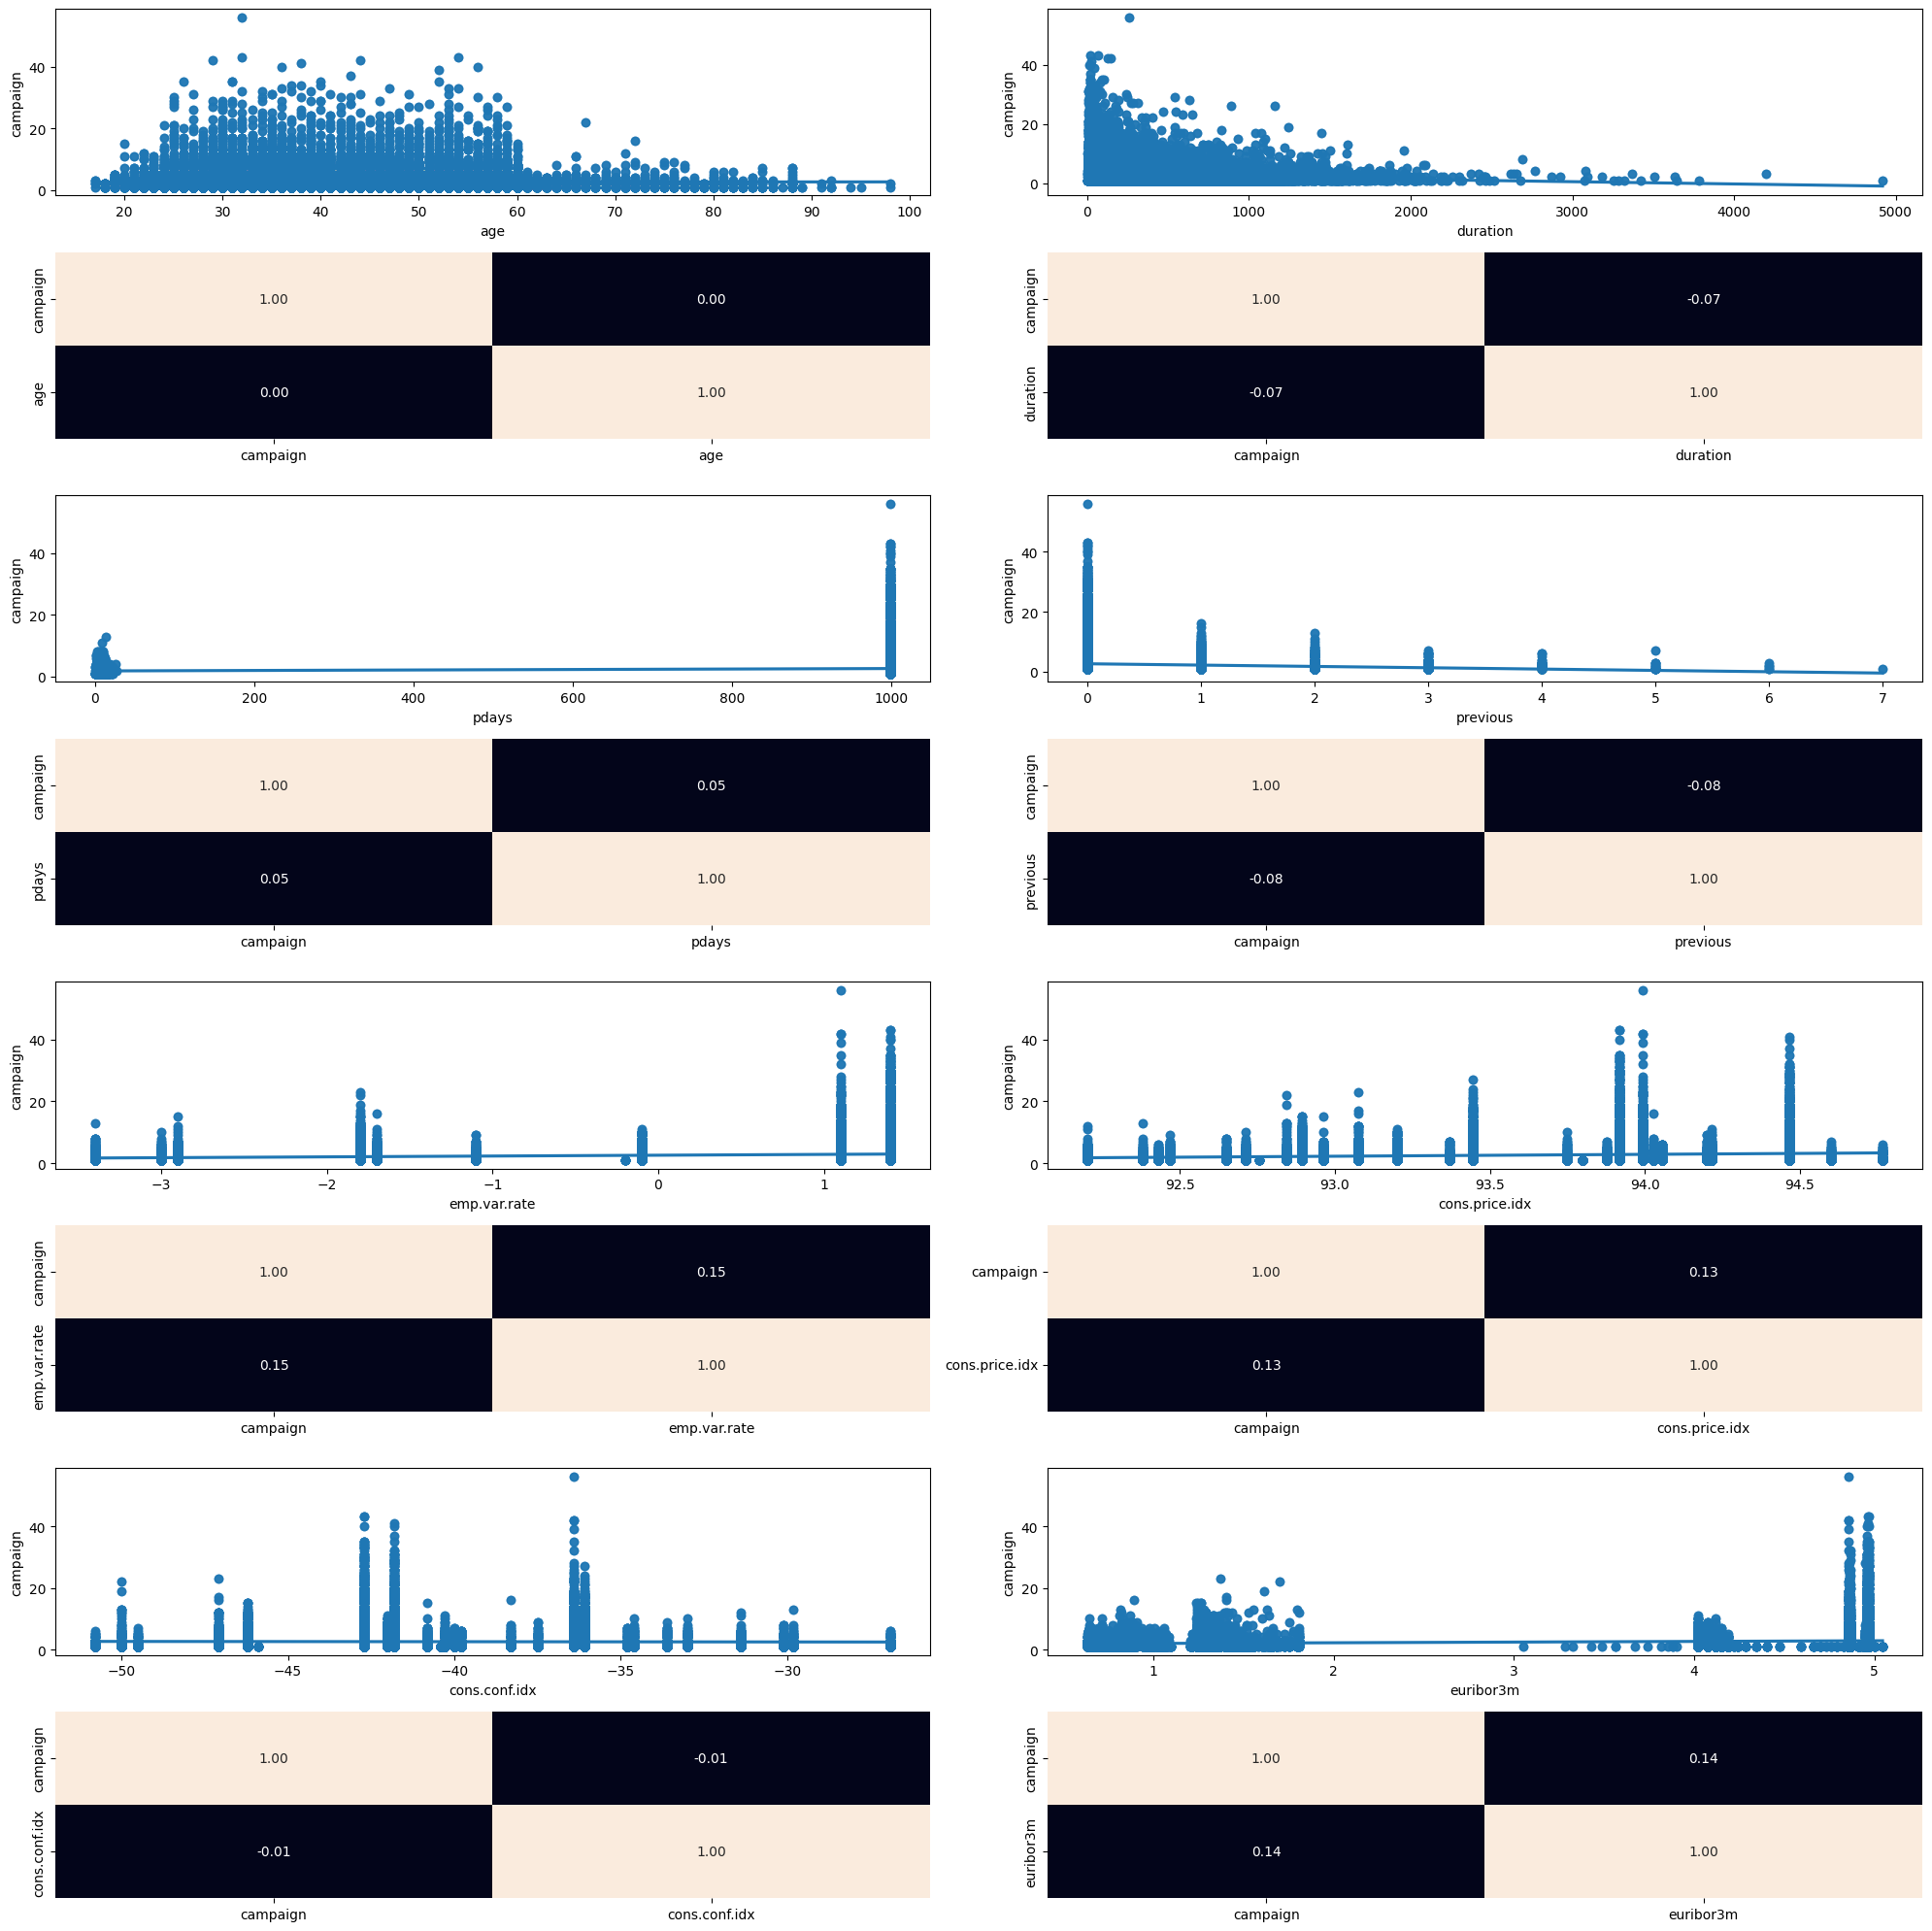

In [39]:
# Numerical-Numerical Analysis of the Dataset

# Draw a canvas
fig, axis = plt.subplots(8, 2, figsize=(20, 20))

# Plot the data
sns.regplot(ax=axis[0,0], data=total_data, x='age', y='campaign')
sns.heatmap(total_data[['campaign', 'age']].corr(), annot=True, fmt='.2f', ax=axis[1,0], cbar=False)
sns.regplot(ax=axis[0,1], data=total_data, x='duration', y='campaign')
sns.heatmap(total_data[['campaign', 'duration']].corr(), annot=True, fmt='.2f', ax=axis[1,1], cbar=False)
sns.regplot(ax=axis[2,0], data=total_data, x='pdays', y='campaign')
sns.heatmap(total_data[['campaign', 'pdays']].corr(), annot=True, fmt='.2f', ax=axis[3,0], cbar=False)
sns.regplot(ax=axis[2,1], data=total_data, x='previous', y='campaign')
sns.heatmap(total_data[['campaign', 'previous']].corr(), annot=True, fmt='.2f', ax=axis[3,1], cbar=False)
sns.regplot(ax=axis[4,0], data=total_data, x='emp.var.rate', y='campaign')
sns.heatmap(total_data[['campaign', 'emp.var.rate']].corr(), annot=True, fmt='.2f', ax=axis[5,0], cbar=False)
sns.regplot(ax=axis[4,1], data=total_data, x='cons.price.idx', y='campaign')
sns.heatmap(total_data[['campaign', 'cons.price.idx']].corr(), annot=True, fmt='.2f', ax=axis[5,1], cbar=False)
sns.regplot(ax=axis[6,0], data=total_data, x='cons.conf.idx', y='campaign')
sns.heatmap(total_data[['campaign', 'cons.conf.idx']].corr(), annot=True, fmt='.2f', ax=axis[7,0], cbar=False)
sns.regplot(ax=axis[6,1], data=total_data, x='euribor3m', y='campaign')
sns.heatmap(total_data[['campaign', 'euribor3m']].corr(), annot=True, fmt='.2f', ax=axis[7,1], cbar=False)

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

#### Categorical - Categorical Analysis

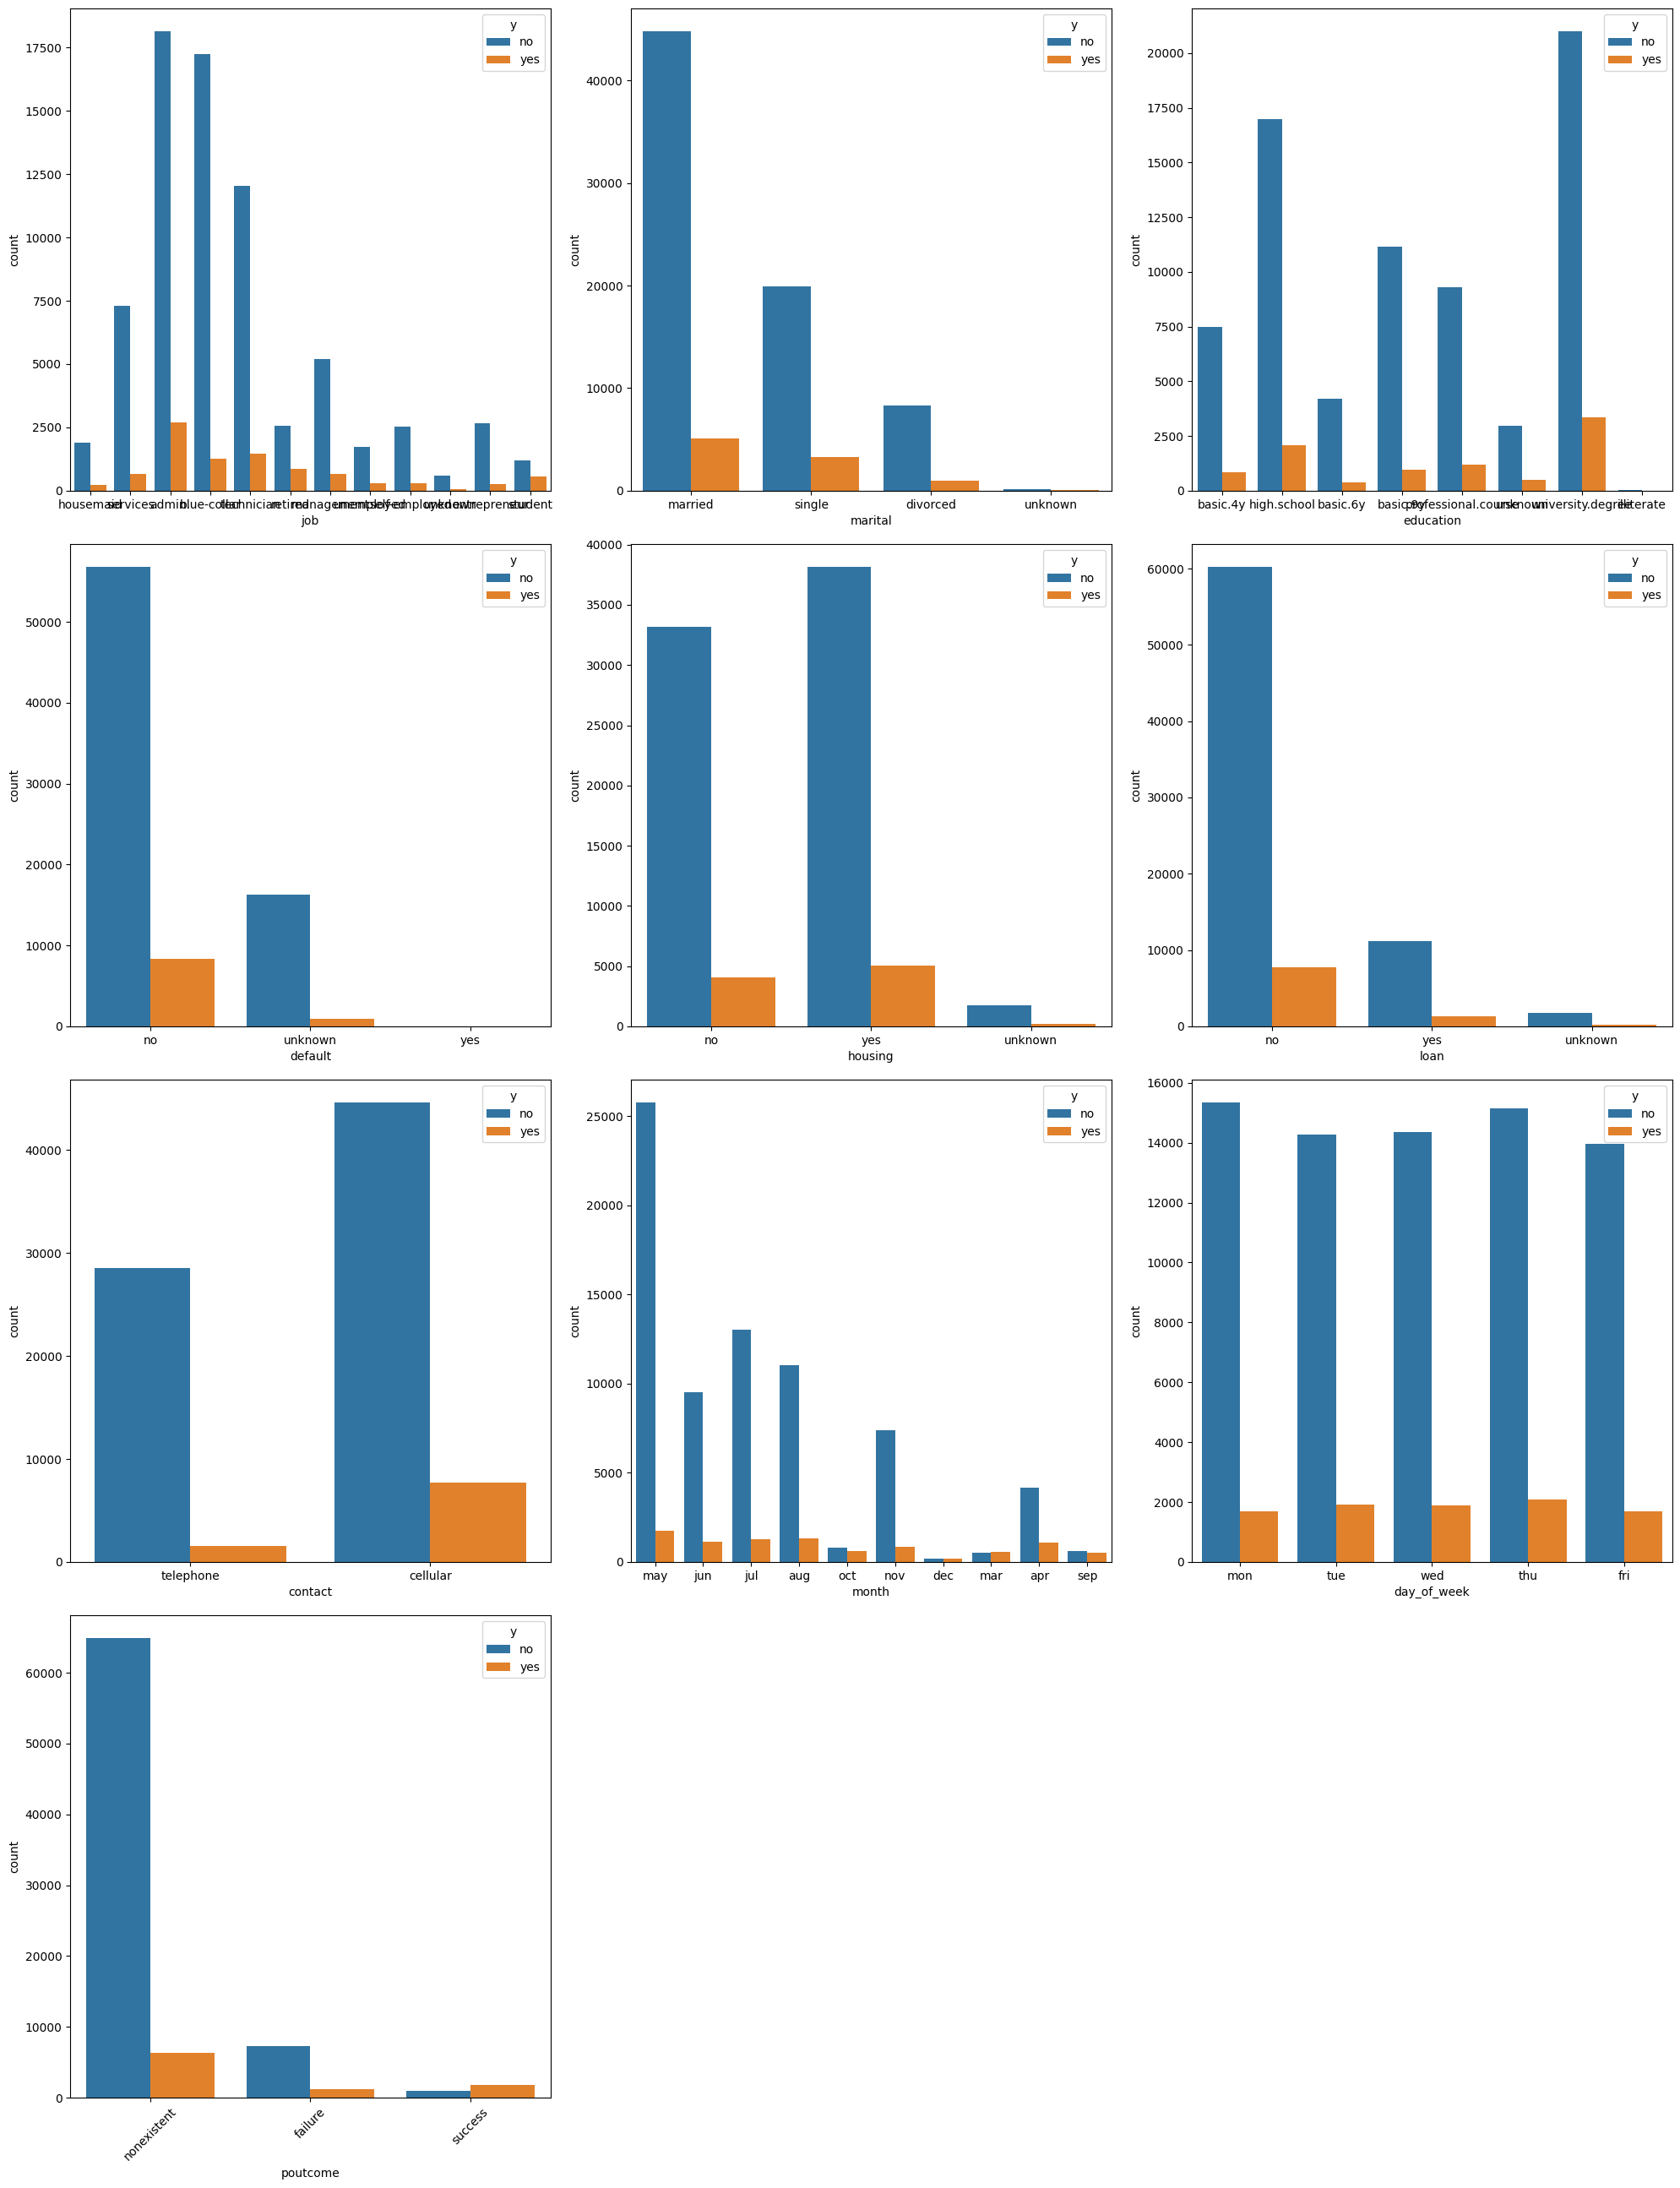

In [40]:
# Categorical - Categorical Analysis - The Class and Several Predictors

# Draw a Canvas
fig, axis = plt.subplots(4, 3, figsize=(20, 26))

# Plot the Data
sns.countplot(ax=axis[0,0], data=total_data, x='job', hue='y')
sns.countplot(ax=axis[0,1], data=total_data, x='marital', hue='y')
sns.countplot(ax=axis[0,2], data=total_data, x='education', hue='y')
sns.countplot(ax=axis[1,0], data=total_data, x='default', hue='y')
sns.countplot(ax=axis[1,1], data=total_data, x='housing', hue='y')
sns.countplot(ax=axis[1,2], data=total_data, x='loan', hue='y')
sns.countplot(ax=axis[2,0], data=total_data, x='contact', hue='y')
sns.countplot(ax=axis[2,1], data=total_data, x='month', hue='y')
sns.countplot(ax=axis[2,2], data=total_data, x='day_of_week', hue='y')
sns.countplot(ax=axis[3,0], data=total_data, x='poutcome', hue='y')
fig.delaxes(axis[3,1])
fig.delaxes(axis[3,2])

# Adjust the layout
plt.xticks(rotation=45)
plt.tight_layout()

# Plot the Layout
plt.show()

We can observe that:

- The Success Rate of the campaign is very low across the board. 
- However we can see that celular contacts have higher chance of success
- People with loans don't want more debts as per graphic
- House Loan customers, tend to accept more than the ones who don't
- University Degree customers have the higher acceptance rate
- Admin workers are also the more accepting ones, perhaps due to lower salaries? 

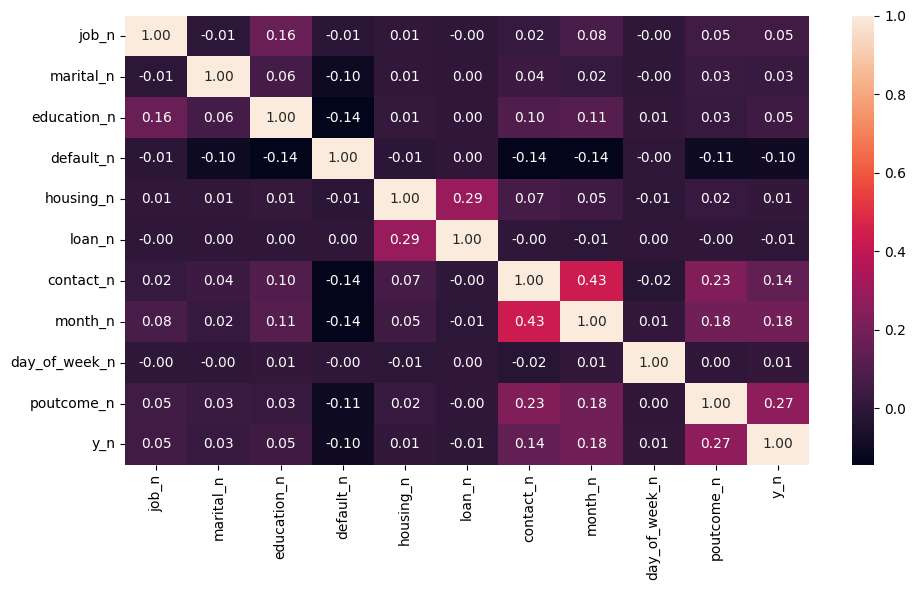

In [41]:
# Factorize the Current Categorical Data
total_data['job_n'] = pd.factorize(total_data['job'])[0]
total_data['marital_n'] = pd.factorize(total_data['marital'])[0]
total_data['education_n'] = pd.factorize(total_data['education'])[0]
total_data['default_n'] = pd.factorize(total_data['default'])[0]
total_data['housing_n'] = pd.factorize(total_data['housing'])[0]
total_data['loan_n'] = pd.factorize(total_data['loan'])[0]
total_data['contact_n'] = pd.factorize(total_data['contact'])[0]
total_data['month_n'] = pd.factorize(total_data['month'])[0]
total_data['day_of_week_n'] = pd.factorize(total_data['day_of_week'])[0]
total_data['poutcome_n'] = pd.factorize(total_data['poutcome'])[0]
total_data['y_n'] = pd.factorize(total_data['y'])[0]

# Draw a Canvas
fig, axis = plt.subplots(figsize = (10, 6))

# Plot a Heatmap
sns.heatmap(total_data[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
                        'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y_n']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

We can observe:

- There's a good correlation between Type of Contact and the Month it was made.
- There's a small relation between having a Housing Loand and a Personal Loan
- And there's also a ver small relation between the Type of contact, the Long-Term Deposit Sale and the Outcome of the Previous Contacts (obviously) 

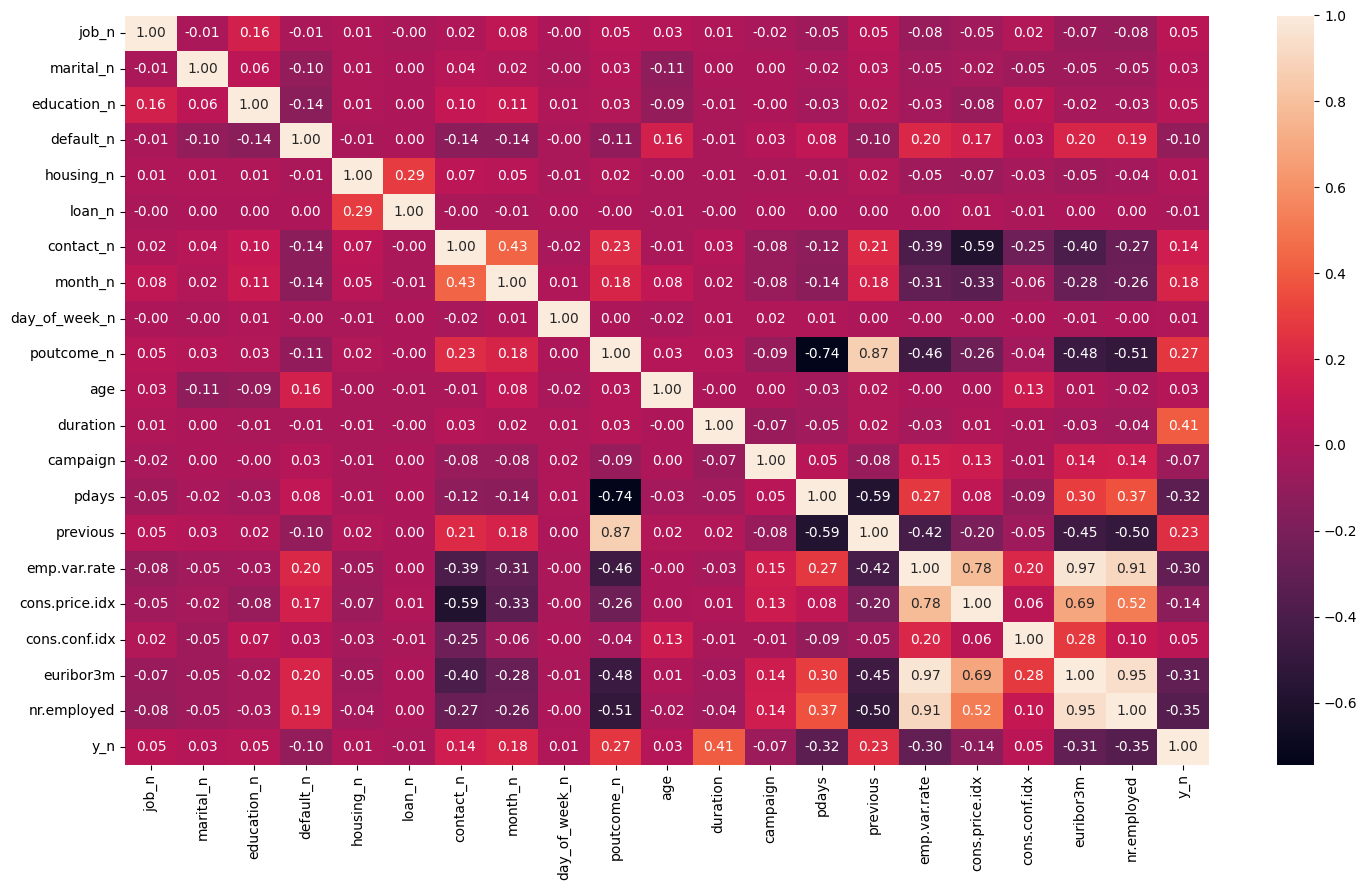

In [42]:
# Complete Correlation Heatmap

# Draw a Canvas
fig, axis = plt.subplots(figsize = (15, 9))

# Plot a Heatmap
sns.heatmap(total_data[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
                        'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'age', 'duration',
                        'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                          'euribor3m', 'nr.employed', 'y_n']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

There's good data here and somewhat expected:

- The Outcome has a high correlation between the number of previous contacts and also the difference in days from last campaign call
- Consumer Price Index, Euribor, Number of Employed People and Consumer Confidence all have tight correlations, as expected. 
- Can mean something, or not, but the duration of the calls have a nice correlatio with the Success of the customer taking longterm deposit. 
- Surprisingly Euribor / Employment / Indexes have a nice correlation with the type of contact, but average relation with the reults of previous contact. 
- It looks like it's in between the time, moment, and effort put on the call plus a little help of the Taxes / Consumer Index.


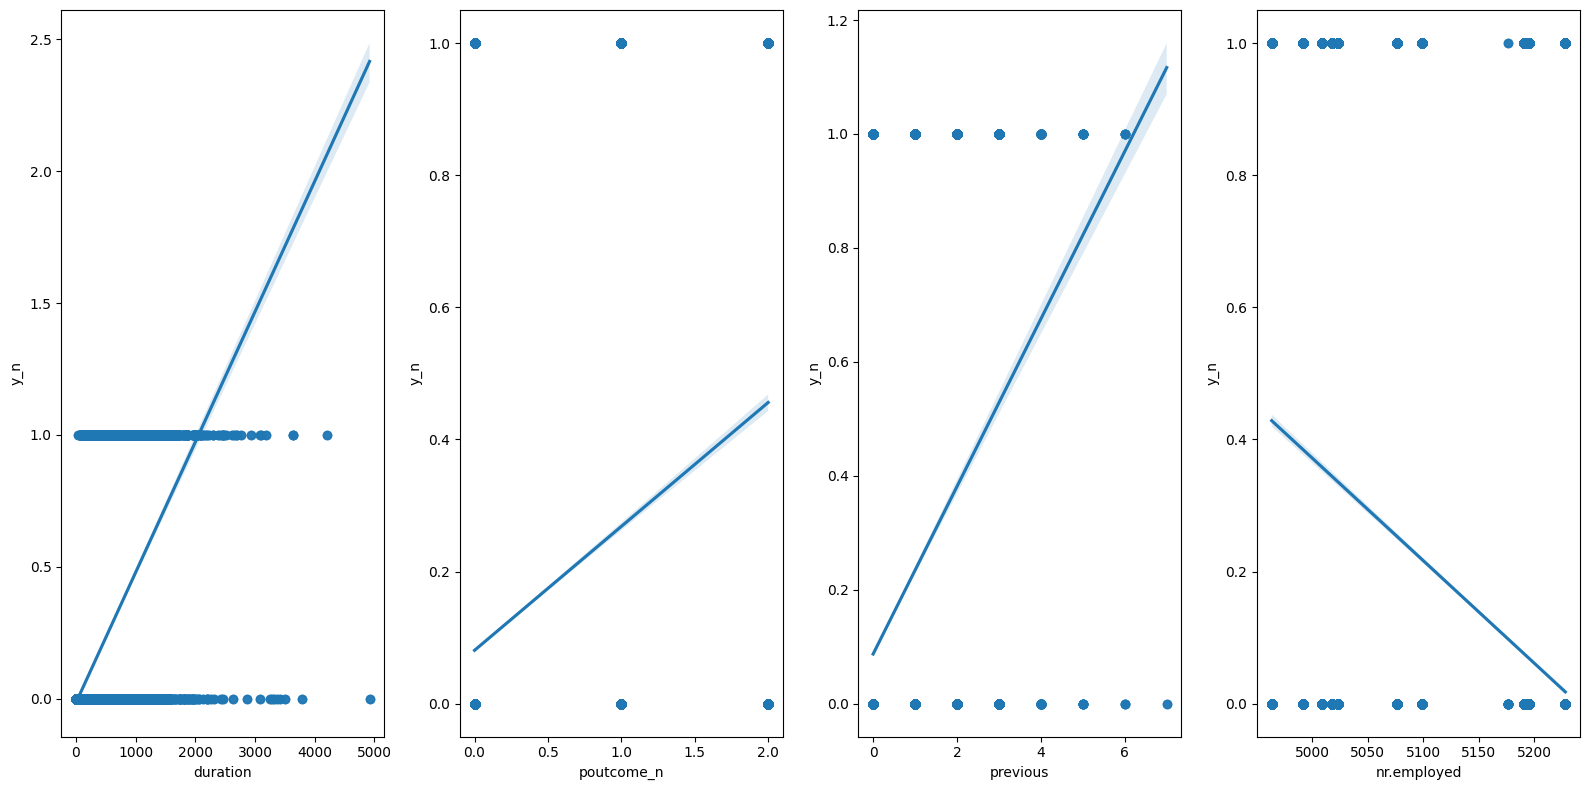

In [43]:
# Regplot the strong relationship Features

fig, axis = plt.subplots(figsize = (16, 8), ncols = 4)

# Plot the Data

sns.regplot(ax=axis[0], data=total_data, x='duration', y='y_n')
sns.regplot(ax=axis[1], data=total_data, x='poutcome_n', y='y_n')
sns.regplot(ax=axis[2], data=total_data, x='previous', y='y_n')
sns.regplot(ax=axis[3], data=total_data, x='nr.employed', y='y_n')

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

In [44]:
# sns.pairplot(data=total_data)

### Feature Engineering

#### Outlier Analysis

In [45]:
# Describe of Features

total_data.describe()

,index,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,82376.00000,82376.000000,82376.000000,82376.000000,82376.000000,82376.000000,82376.000000,82376.000000,82376.00000,82376.000000,...,82376.000000,82376.000000,82376.000000,82376.000000,82376.000000,82376.000000,82376.000000,82376.000000,82376.000000,82376.000000
mean,20593.50000,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.50260,3.621291,...,0.510634,3.277532,0.208872,0.571914,0.199767,0.634748,2.250097,1.979581,0.169904,0.112654
std,11890.02361,10.421187,259.277675,2.769997,186.909773,0.494898,1.570950,0.578837,4.62817,1.734437,...,0.696775,2.185512,0.406684,0.541206,0.455999,0.481504,2.429064,1.411506,0.455751,0.316172
min,0.00000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.80000,0.634000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10296.75000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.70000,1.344000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,20593.50000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.80000,4.857000,...,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,30890.25000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.40000,4.961000,...,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,41187.00000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.90000,5.045000,...,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


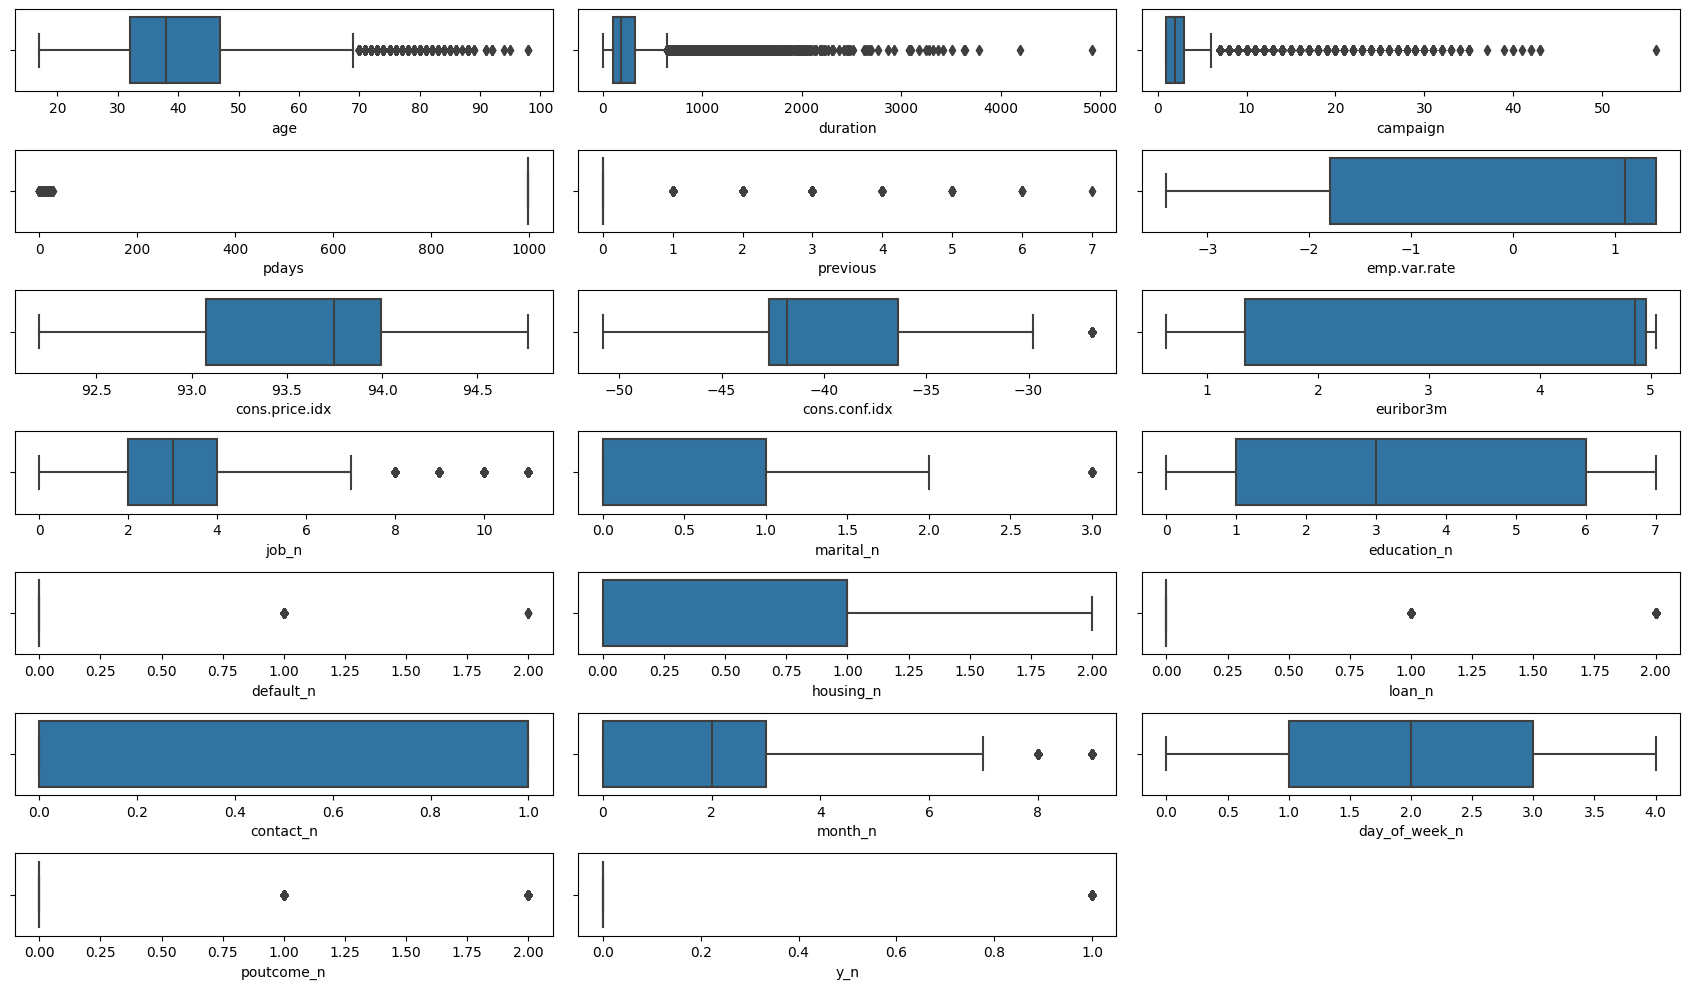

In [46]:
# Boxplots to Observe Outliers 

# Draw canvas
fig, axis = plt.subplots(7, 3, figsize=(17,10))

sns.boxplot(ax=axis[0,0], data=total_data, x='age')
sns.boxplot(ax=axis[0,1], data=total_data, x='duration')
sns.boxplot(ax=axis[0,2], data=total_data, x='campaign')
sns.boxplot(ax=axis[1,0], data=total_data, x='pdays')
sns.boxplot(ax=axis[1,1], data=total_data, x='previous')
sns.boxplot(ax=axis[1,2], data=total_data, x='emp.var.rate')
sns.boxplot(ax=axis[2,0], data=total_data, x='cons.price.idx')
sns.boxplot(ax=axis[2,1], data=total_data, x='cons.conf.idx')
sns.boxplot(ax=axis[2,2], data=total_data, x='euribor3m')
sns.boxplot(ax=axis[3,0], data=total_data, x='job_n')
sns.boxplot(ax=axis[3,1], data=total_data, x='marital_n')
sns.boxplot(ax=axis[3,2], data=total_data, x='education_n')
sns.boxplot(ax=axis[4,0], data=total_data, x='default_n')
sns.boxplot(ax=axis[4,1], data=total_data, x='housing_n')
sns.boxplot(ax=axis[4,2], data=total_data, x='loan_n')
sns.boxplot(ax=axis[5,0], data=total_data, x='contact_n')
sns.boxplot(ax=axis[5,1], data=total_data, x='month_n')
sns.boxplot(ax=axis[5,2], data=total_data, x='day_of_week_n')
sns.boxplot(ax=axis[6,0], data=total_data, x='poutcome_n')
sns.boxplot(ax=axis[6,1], data=total_data, x='y_n')
fig.delaxes(axis[6,2])

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

We can see that some data has outliers, age, previous, campaign, previous consumer confidence, job, marital, loan, month, outcome and Y Target.

Let's analyze if those Outliers should be kept, deleted or replaced. From a first observation I'd say there's little to remove here. §

In [47]:
# Age Analysis

age_stats = total_data['age'].describe()
print(age_stats)

count    82376.000000
mean        40.024060
std         10.421187
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64


In [48]:
# Age IQR

age_iqr = age_stats['75%'] - age_stats['25%']
upper_limit = age_stats['75%'] + 1.5 * age_iqr
lower_limit = age_stats['25%'] - 1.5 * age_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

The upper and lower limits for finding outliers are 69.5 and 9.5, with an interquartile range of 15.0


Despite showing that above 69.5 it's consider an Outlier, since Age for a Long Term Deposit is not an issue as a loan, I'm going to keep all age outliers because they can tell us much things about the type of customer who bought in the Campaign. 

In [49]:
# Duration Analysis

duration_stats = total_data['duration'].describe()
print(duration_stats)

count    82376.000000
mean       258.285010
std        259.277675
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


In [50]:
# Duration IQR

duration_iqr = duration_stats['75%'] - duration_stats['25%']
upper_limit = duration_stats['75%'] + 1.5 * duration_iqr
lower_limit = duration_stats['25%'] - 1.5 * duration_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(duration_iqr, 2)}")

The upper and lower limits for finding outliers are 644.5 and -223.5, with an interquartile range of 217.0


Again, not cutting outliers here, as 5000 seconds (83 minutes) can perfectly happen in a call if customer and agent are setting up the product. 
Keeping the outliers here is important as well, as call duration can let us understand many patterns about success or failure.

In [51]:
# Campaign Analysis

campaign_stats = total_data['campaign'].describe()
print(campaign_stats)

count    82376.000000
mean         2.567593
std          2.769997
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


In [52]:
# Campaign IQR

campaign_iqr = campaign_stats['75%'] - campaign_stats['25%']
upper_limit = campaign_stats['75%'] + 1.5 * campaign_iqr
lower_limit = campaign_stats['25%'] - 1.5 * campaign_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(campaign_iqr, 2)}")

The upper and lower limits for finding outliers are 6.0 and -2.0, with an interquartile range of 2.0


In [53]:
# Trimm the Outliers 
total_data = total_data[total_data["campaign"] <= 15]

Above 15 effective calls seems quite an odd number of contacts to a customer in a year. 

#### Null Analysis

In [54]:
# Count the Nulls

total_data.isnull().sum().sort_values(ascending=False)

index             0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
month_n           0
day_of_week_n     0
poutcome_n        0
y_n               0
dtype: int64

There are no Null Values. 

#### Feature Scalling

In [55]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
                 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'age', 'duration',
                 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                 'euribor3m', 'nr.employed', 'y_n']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


#### Feature Selection

In [56]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_scal.drop('y_n', axis = 1)
y = total_data_scal['y_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.000000,0.104167,0.140104,0.425709
1,0.5,0.142857,0.687500,0.806393,0.877883
2,0.0,0.000000,0.937500,0.956926,0.859735
3,0.0,0.000000,1.000000,0.981183,1.000000
4,0.5,0.142857,0.000000,0.018590,0.203781


In [57]:
X_train_sel['y_n'] = list(y_train)
X_test_sel['y_n'] = list(y_test)
X_train_sel.to_csv('/workspaces/gustavolima-bank-eda/data/processed/clean_train-bankmkt.csv', index=False)
X_test_sel.to_csv('/workspaces/gustavolima-bank-eda/data/processed/clean_test-bankmkt.csv', index=False)

### Logistic Regression Training

#### Import Clean Data

In [59]:
train_data = pd.read_csv('/workspaces/gustavolima-bank-eda/data/processed/clean_train-bankmkt.csv')
test_data = pd.read_csv('/workspaces/gustavolima-bank-eda/data/processed/clean_test-bankmkt.csv')

train_data.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.000000,0.104167,0.140104,0.425709,1.0
1,0.5,0.142857,0.687500,0.806393,0.877883,0.0
2,0.0,0.000000,0.937500,0.956926,0.859735,0.0
3,0.0,0.000000,1.000000,0.981183,1.000000,0.0
4,0.5,0.142857,0.000000,0.018590,0.203781,0.0


In [60]:
X_train = train_data.drop(['y_n'], axis = 1)
y_train = train_data['y_n']
X_test = test_data.drop(['y_n'], axis = 1)
y_test = test_data['y_n']

#### Initiate Model Training (Logistic Regression)

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##### Model Prediction

In [62]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

##### Accuracy Test

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8902901922370515

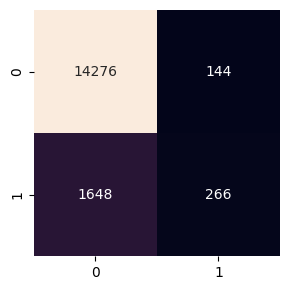

In [65]:
from sklearn.metrics import confusion_matrix

bankmkt_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bankmkt_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

#### Hyperparameter Optimization

In [66]:
train_data = pd.read_csv('/workspaces/gustavolima-bank-eda/data/processed/clean_train-bankmkt.csv')
test_data = pd.read_csv('/workspaces/gustavolima-bank-eda/data/processed/clean_test-bankmkt.csv')

X_train = train_data.drop(['y_n'], axis = 1)
y_train = train_data['y_n']
X_test = test_data.drop(['y_n'], axis = 1)
y_test = test_data['y_n']

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.8902901922370515

#### Grid Search Optimization

In [67]:
from sklearn.model_selection import GridSearchCV

# We define the parameters by hand that we want to adjust
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [68]:
# Launch Results

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: U

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


##### Model Run with new Parameters

In [69]:
# Run Model Again and see result

model_grid = LogisticRegression(penalty = "l2", C = 0.1, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8913921880739561

The increase was of 0.001% which is not significant. Let's try with other Optimization Method. 

#### Random Search Optimization

In [70]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [71]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: U

Best hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.033598182862837805}


In [72]:
# Retrain the Model

model_random_search = LogisticRegression(penalty = "l2", C = 0.033598182862837805, solver = "lbfgs")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.8922492959471042

We've won a 0.002% Optimization vs original Logistic Regression Training.